# **Covid 19 country wise latest Project**

## **Data Visualization**

### **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Load Dataset**

In [2]:
df = pd.read_csv("covid_19_country_wise_latest.csv")

In [3]:
df.head()

,Unnamed: 0,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0,Afghanistan,36263,1269,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,1,Albania,4880,144,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,2,Algeria,27973,1163,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,3,Andorra,907,52,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,4,Angola,950,41,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,Africa


### **Set index and rename**

In [4]:
df = df.set_index("Unnamed: 0")

In [5]:
df.index.name = "index"

### **Function to replace whitespace in column names**

In [6]:
def clean_column_names(df):
    df.columns = df.columns.str.replace(" ", "_")
    return df

In [7]:
df = clean_column_names(df)

### **Basic information**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    object 
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New_cases               177 non-null    float64
 6   New_deaths              177 non-null    float64
 7   New_recovered           187 non-null    int64  
 8   Deaths_/_100_Cases      187 non-null    float64
 9   Recovered_/_100_Cases   187 non-null    float64
 10  Deaths_/_100_Recovered  187 non-null    float64
 11  Confirmed_last_week     187 non-null    int64  
 12  1_week_change           187 non-null    int64  
 13  1_week_%_increase       187 non-null    float64
 14  WHO_Region              187 non-null    object 

In [9]:
df.isnull().sum()

Country/Region             0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
New_cases                 10
New_deaths                10
New_recovered              0
Deaths_/_100_Cases         0
Recovered_/_100_Cases      0
Deaths_/_100_Recovered     0
Confirmed_last_week        0
1_week_change              0
1_week_%_increase          0
WHO_Region                 0
dtype: int64

### **Fill NaN values with column mean**

In [10]:
df.fillna(df.mean(numeric_only=True), inplace=True)

###  **Count unique countries**

In [11]:
num_countries = df['Country/Region'].nunique()

In [12]:
num_countries

187

### **Check and remove duplicate country entries**

In [13]:
df = df.drop_duplicates(subset=['Country/Region'])

### **Mean, median, standard deviation of Total Cases**

In [14]:
print(df.columns)

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New_cases', 'New_deaths', 'New_recovered', 'Deaths_/_100_Cases',
       'Recovered_/_100_Cases', 'Deaths_/_100_Recovered',
       'Confirmed_last_week', '1_week_change', '1_week_%_increase',
       'WHO_Region'],
      dtype='object')


In [15]:
df['New_cases'].mean()

np.float64(1282.7401129943503)

In [16]:
df['New_cases'].median()

np.float64(71.0)

In [17]:
df['New_cases'].std()

np.float64(5704.395582113169)

### **Handle non_numeric values in Deaths column**

In [18]:
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')

In [19]:
df['Deaths'].fillna(df['Deaths'].mean(), inplace=True)

C:\Users\zafir\AppData\Local\Temp\ipykernel_12196\3150897308.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Deaths'].fillna(df['Deaths'].mean(), inplace=True)


### **Change datatype of Deaths column**

In [20]:
df['Deaths'] = df['Deaths'].astype(int)

### **Calculate total deaths and recoveries worldwide**

In [21]:
total_deaths = df['Deaths'].sum()

In [22]:
total_deaths

np.int64(657516)

In [23]:
total_recoveries = df['Recovered'].sum()

In [24]:
total_recoveries

np.int64(9468087)

### **Countries with more than 1M cases**

In [26]:
high_case_countries = df[df['New_cases'] > 1_000_000]

In [27]:
high_case_countries['Country/Region'].tolist()

[]

### **Countries with recovery rate above 95%**

In [28]:
df['Recovery_Rate'] = (df['Recovered'] / df['New_cases']) * 100

In [29]:
high_recovery_countries = df[df['Recovery_Rate'] > 95]

In [30]:
high_recovery_countries['Country/Region'].tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'I

In [31]:
print(df.columns)

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New_cases', 'New_deaths', 'New_recovered', 'Deaths_/_100_Cases',
       'Recovered_/_100_Cases', 'Deaths_/_100_Recovered',
       'Confirmed_last_week', '1_week_change', '1_week_%_increase',
       'WHO_Region', 'Recovery_Rate'],
      dtype='object')


### **Drop WHO Region and Confirmed columns**

In [32]:
df.drop(columns=['WHO_Region', 'Confirmed'], inplace=True)

### **Country with max deaths**

In [33]:
max_death_country = df.loc[df['Deaths'].idxmax(), 'Country/Region']
max_death_country

'US'

### **Sort countries by deaths**

In [34]:
df_sorted = df.sort_values(by='Deaths', ascending=False)

In [35]:
df_sorted[['Country/Region', 'Deaths']].head()

,Country/Region,Deaths
index,,
173,US,148011
23,Brazil,87618
177,United Kingdom,45844
111,Mexico,44022
85,Italy,35112


### **Create Total cases column**

In [36]:
df['Total_cases'] = df['Deaths'] + df['Recovered'] + df['Active']

### **Calculate Death Rate**

In [37]:
df['Death_Rate'] = (df['Deaths'] / df['Total_cases']) * 100

### **Identify countries with increasing cases but low death rates**

In [38]:
low_death_rate_countries = df[(df['Total_cases'] > 100000) & (df['Death_Rate'] < 2)]

In [39]:
low_death_rate_countries['Country/Region'].tolist()

['Argentina', 'Bangladesh', 'Qatar', 'Russia', 'Saudi Arabia', 'South Africa']

### **Display specific columns**

In [40]:
df_subset = df[['Country/Region', 'Death_Rate']]

In [41]:
df_subset.head()

,Country/Region,Death_Rate
index,,
0,Afghanistan,3.499435
1,Albania,2.950820
2,Algeria,4.157581
3,Andorra,5.733186
4,Angola,4.315789


### **Scatter plot of Total Cases vs Deaths**

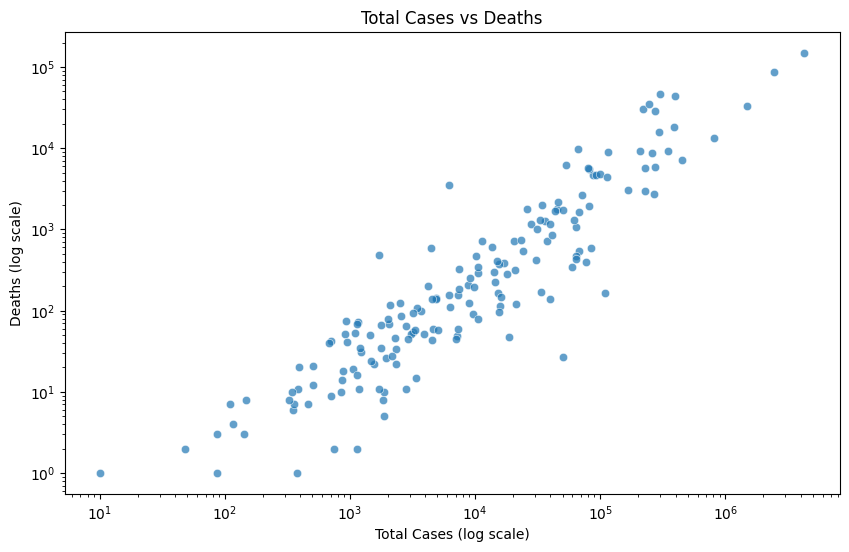

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Total_cases', y='Deaths', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Total Cases (log scale)")
plt.ylabel("Deaths (log scale)")
plt.title("Total Cases vs Deaths")
plt.show()


### **Save dataset**

In [44]:
df.to_csv("processed_covid_data.csv", index=False)